In [1]:
import numpy as np
from numpy import sin, pi
import matplotlib.pyplot as plt

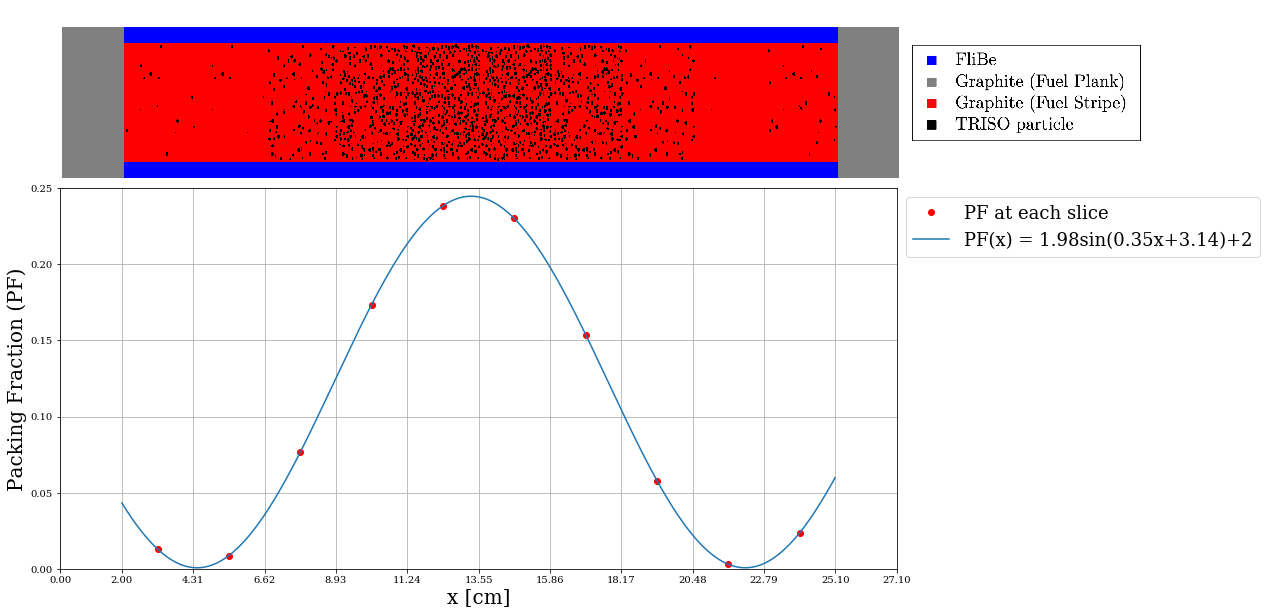

In [2]:
a = 1.989
b = 0.354
c = 3.143
d = 2
# normalization 
total_pf = 0.0979
T_r5 = 4235e-5
vol_total, vol_slice = 80, 8
vol_triso = 4 / 3 * pi * T_r5 ** 3
no_trisos = total_pf * vol_total / vol_triso
boundaries = np.arange(2,27.1,2.31)
midpoints = [] 
for x in range(len(boundaries)-1):
    midpoints.append((boundaries[x]+boundaries[x+1])/2)
midpoints = np.array(midpoints)
sine_val = a * sin(b * midpoints + c) + 2
sine_val = np.where(sine_val<0, 0, sine_val)
triso_z = sine_val / sum(sine_val) * no_trisos
pf_z = triso_z * vol_triso / vol_slice

x = np.arange(2,25.1,0.01)
y = (a * np.sin(b*x+c) + d) / sum(sine_val) * no_trisos * vol_triso / vol_slice
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(midpoints, pf_z, "ro", label="PF at each slice")
ax.plot(x, y, label=r"PF(x) = 1.98sin(0.35x+3.14)+2")
im = plt.imread("plot_1.png")
newax = fig.add_axes([0.084, 0.74, 0.858, 0.5], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')
im2 = plt.imread("legend.png")
newax2 = fig.add_axes([0.27, 0.97, 0.858, 0.2], anchor='NE', zorder=-1)
newax2.imshow(im2)
newax2.axis('off')
ax.set_xticks(np.append(0,np.append(np.arange(2,27.1,2.31),27.1)))
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor=(1.,1.,))
ax.set_xlim(0,27.1)
ax.set_ylim(0.0, 0.25)
ax.set_xlabel("x [cm]", fontsize=20)
ax.set_ylabel("Packing Fraction (PF)", fontsize=20)
plt.savefig('triso_distribution_sine_39.png',bbox_inches='tight')